In [1]:
import pickle
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
training_file = 'train_python2.p'
testing_file = 'test_python2.p'

with open(training_file, mode = 'rb') as f:
    train = pickle.load(f)
with open(testing_file, mode = 'rb') as f:
    test = pickle.load(f)

X_train_raw, y_train_raw = train['features'], train['labels']
X_test_raw, y_test = test['features'], test['labels']

print("Training size x: {}".format(len(X_train_raw)))
print("Training size y: {}".format(len(y_train_raw)))
print("Test size x: {}".format(len(X_test_raw)))
print("Test size y: {}".format(len(y_test)))

print("Image shape: {}".format(X_train_raw[0].shape))

print("Classes: {}".format(len(set(y_train_raw))))

Training size x: 39209
Training size y: 39209
Test size x: 12630
Test size y: 12630
Image shape: (32, 32, 3)
Classes: 43


Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

    'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
    'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
    'sizes' is a list containing tuples, (width, height) representing the original width and height the image.
    'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the pandas shape method might be useful for calculating some of the summary results.

In [3]:
# TODO: Number of training examples
n_train = X_train_raw.shape[0]

# TODO: Number of testing examples.
n_test = X_test_raw.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_raw[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print "Number of training examples: " + str(n_train)
print "Number of testing examples: " + str(n_test)
print "Image data shape: " + str(image_shape)
print "Number of classes: " + str(n_classes)

Number of training examples: 39209
Number of testing examples: 12630
Image data shape: (32, 32, 3)
Number of classes: 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The Matplotlib examples and gallery pages are a great resource for doing visualizations in Python.

NOTE: It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.
Visualize

In the below cells I will add some visualizations.

First up, as is often important in machine learning tasks, we need to check the distribution of the data; in this case, how many of each sign we have in our dataset. If it is too skewed, the model might appear to get a high training accuracy while deciding just to constantly misclassify some of the small classes.


9


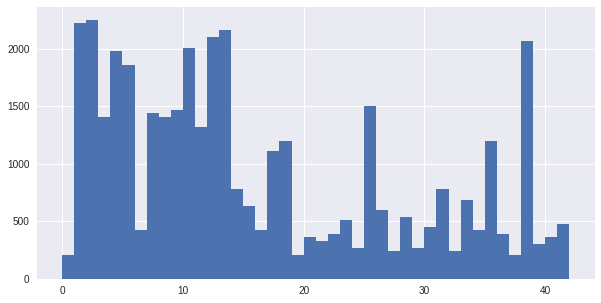

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

index = random.randint(0, len(X_train_raw))
image = X_train_raw[index]
plt.figure(figsize = (10, 5))
plt.hist(y_train_raw, bins = range(43))
print(y_train_raw[index])

Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the German Traffic Sign Dataset.

There are various aspects to consider when thinking about this problem:

    Neural network architecture
    Play around preprocessing techniques (normalization, rgb to grayscale, etc)
    Number of examples per label (some have more than others).
    Generate fake data.

Here is an example of a published baseline model on this problem. It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

NOTE: The LeNet-5 implementation shown in the classroom at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!
Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.


Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data and can be used in this project.

Other pre-processing steps are optional. You can try different techniques to see if it improves performance.

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.


Notes:

step1: Reshape
step2: scale the raster , so that the data has mean zero and equal variance. The normalization is basically a preconditioning to decrease condition number of the matrix A

(the larger the condition number, the nearer the matrix is to the singular matrix).

The normalizing transform is also represented by a matrix in the case of homography estimation, and this happens to be usable as a good preconditioner matrix. The reason why is that is more elaborate and is explained briefly in H&Z book (4.4.4, p. 107: Why is normalization essential?) or in more detail in the paper "In Defense of the Eight-point Algorithm".

Put it simply, the matrix A
consists of products of image coordinates which can have different scale. If the scale differs by factor of 10, the products differ by a factor of 102.

The source and target coordinate data are usually noisy. Without normalization, the data from source would can have two orders of magnitude larger variance than from target (or vice versa).

Some times when normalizing is good:

1) Several algorithms, in particular SVMs come to mind, can sometimes converge far faster on normalized data (although why, precisely, I can't recall).

2) When your model is sensitive to magnitude, and the units of two different features are different, and arbitrary. This is like the case you suggest, in which something gets more influence than it should.

But of course -- not all algorithms are sensitive to magnitude in the way you suggest. Linear regression coefficients will be identical if you do, or don't, scale your data, because it's looking at proportional relationships between them.

Some times when normalizing is bad:

1) When you want to interpret your coefficients, and they don't normalize well. Regression on something like dollars gives you a meaningful outcome. Regression on proportion-of-maximum-dollars-in-sample might not.

2) When, in fact, the units on your features are meaningful, and distance does make a difference! Back to SVMs -- if you're trying to find a max-margin classifier, then the units that go into that 'max' matter. Scaling features for clustering algorithms can substantially change the outcome. Imagine four clusters around the origin, each one in a different quadrant, all nicely scaled. Now, imagine the y-axis being stretched to ten times the length of the the x-axis. instead of four little quadrant-clusters, you're going to get the long squashed baguette of data chopped into four pieces along its length! (And, the important part is, you might prefer either of these!)

In I'm sure unsatisfying summary, the most general answer is that you need to ask yourself seriously what makes sense with the data, and model, you're using.

The homography estimation usually finds parameters in a least-squares sense - hence the best statistical estimate is found only if variances of the parameters are the same (or known beforehand, but it is more practical just to normalize the input).

Direct solvers do not like poorly scaled problems because numerical instabilities appear (e.g. dividing very large number by a very small number easily leads to numerical overflow).

Iterative solvers struggle with badly conditioned matrices by needing more iterations.

So normalization is essential not only for numerical stability, but also for more accurate estimation in presence of noise and faster solution (in case of iterative solver).


In [5]:
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer

X_train_tmp = X_train_raw.reshape(X_train_raw.shape[0], -1)
X_test_tmp = X_test_raw.reshape(X_test_raw.shape[0], -1)

minmax_scale = preprocessing.MinMaxScaler().fit(X_train_tmp)
X_train_norm = minmax_scale.transform(X_train_tmp).reshape(X_train_raw.shape)
X_test = minmax_scale.transform(X_test_tmp).reshape(X_test_raw.shape)

index = random.randint(0, len(X_train_norm))
image = X_train_norm[index]

X_train, y_train = shuffle(X_train_norm, y_train_raw)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2,random_state = 15)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

class Model:
    
    def __init__(self, learning_rate = 0.001, beta = 0.0005, mu = 0, sigma = 0.1, prob1 = 1.0, prob2 = 1.0):
        
        self.X = x = tf.placeholder(tf.float32, (None, 32, 32, 3))
        self.Y = tf.placeholder(tf.int32, (None))
        
        self.weights = [tf.Variable(tf.truncated_normal([3, 3, 3, 32],mean = mu, stddev = sigma)),
                tf.Variable(tf.truncated_normal([3, 3, 32, 32],mean = mu, stddev = sigma)),
                tf.Variable(tf.truncated_normal([3, 3, 32, 96],mean = mu, stddev = sigma)),
                tf.Variable(tf.truncated_normal([3, 3, 96, 96],mean = mu, stddev = sigma)),
                tf.Variable(tf.truncated_normal([2400, 400],mean = mu, stddev = sigma)),
                tf.Variable(tf.truncated_normal([400, 84],mean = mu, stddev = sigma)),
                tf.Variable(tf.truncated_normal([84, 43],mean = mu, stddev = sigma))]
        
        self.bias = [tf.Variable(tf.zeros(32)),
                tf.Variable(tf.zeros(32)),
                tf.Variable(tf.zeros(96)),
                tf.Variable(tf.zeros(96)),
                tf.Variable(tf.zeros(400)),
                tf.Variable(tf.zeros(84)),
                tf.Variable(tf.zeros(43))]
        
        def conv2d(x, W, b, strides = 1): 
            x = tf.nn.conv2d(x, W, strides = [1, strides, strides, 1], padding = 'VALID') 
            x = tf.nn.bias_add(x, b) 
            return tf.nn.relu(x)
        
        x = tf.nn.dropout(self.X, prob2)
        conv_net = conv2d(x, self.weights[0], self.bias[0], 1)
        conv_net = conv2d(conv_net, self.weights[1], self.bias[1], 2)
        conv_net = tf.nn.dropout(conv_net, prob1)
        conv_net = conv2d(conv_net, self.weights[2], self.bias[2], 1)
        conv_net = conv2d(conv_net, self.weights[3], self.bias[3], 2)
        conv_net = tf.nn.dropout(conv_net, prob1)
        fc1 = tf.reshape(conv_net, [-1, 2400])
        fc1 = tf.nn.relu(tf.add(tf.matmul(fc1, self.weights[4]), self.bias[4]))
        fc1 = tf.nn.dropout(fc1, prob1)
        fc2 = tf.nn.relu(tf.add(tf.matmul(fc1, self.weights[5]), self.bias[5]))
        fc2 = tf.nn.dropout(fc2, prob1)
        
        self.logits = tf.add(tf.matmul(fc2, self.weights[6]), self.bias[6])
        self.one_hot_y = tf.one_hot(self.Y, 43)
        
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = self.logits, labels = self.one_hot_y) + \
                    beta * tf.nn.l2_loss(self.weights[0]) + \
                    beta * tf.nn.l2_loss(self.weights[1]) + \
                    beta * tf.nn.l2_loss(self.weights[2]) + \
                    beta * tf.nn.l2_loss(self.weights[3]) + \
                    beta * tf.nn.l2_loss(self.weights[4]) + \
                    beta * tf.nn.l2_loss(self.weights[5]) + \
                    beta * tf.nn.l2_loss(self.weights[6])


        self.loss_operation = tf.reduce_mean(cross_entropy)
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.loss_operation)

        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
import os
EPOCH = 15
BATCH_SIZE = 128

sess = tf.InteractiveSession()
model = Model()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver(tf.global_variables())

def evaluate(X_data, y_data):
    total_accuracy = 0
    for x in xrange(0, X_data.shape[0], BATCH_SIZE):
        batch_x, batch_y = X_data[x: x + BATCH_SIZE], y_data[x: x + BATCH_SIZE]
        accuracy = sess.run(model.accuracy_operation, feed_dict = {model.X: batch_x, model.Y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / (X_data.shape[0] * 1.0)

for i in xrange(EPOCH):
    LOSS = 0;
    for x in xrange(0, X_train.shape[0], BATCH_SIZE):
        batch_x, batch_y = X_train[x: x + BATCH_SIZE], y_train[x: x + BATCH_SIZE]
        _, loss = sess.run([model.optimizer, model.loss_operation], feed_dict={model.X: batch_x, model.Y: batch_y})
        LOSS += loss
        
    
    ACCURACY = evaluate(X_validation, y_validation)
    LOSS /= (X_train.shape[0] / (BATCH_SIZE * 1.0))
    print 'iteration: ' + str(i + 1) + ', loss: ' + str(LOSS) + ', accuracy: ' + str(ACCURACY)
    saver.save(sess, os.getcwd() + "/model.ckpt")

iteration: 1, loss: 2.35314835407, accuracy: 0.93292527418
iteration: 2, loss: 1.10611479289, accuracy: 0.965570007788
iteration: 3, loss: 0.832651871705, accuracy: 0.966207600117
iteration: 4, loss: 0.661337871663, accuracy: 0.965442489161
iteration: 5, loss: 0.538397771823, accuracy: 0.977939301335
iteration: 6, loss: 0.439332628264, accuracy: 0.979214486237
iteration: 7, loss: 0.372329712522, accuracy: 0.978831930645
iteration: 8, loss: 0.313496735629, accuracy: 0.983167559296
iteration: 9, loss: 0.266490716643, accuracy: 0.983932670237
iteration: 10, loss: 0.235368087483, accuracy: 0.978066819689
iteration: 11, loss: 0.214289258754, accuracy: 0.988013261923
iteration: 12, loss: 0.194551204417, accuracy: 0.983932670237
iteration: 13, loss: 0.1853242491, accuracy: 0.982019892884
iteration: 14, loss: 0.174092954584, accuracy: 0.988650854374
iteration: 15, loss: 0.149850285117, accuracy: 0.985462892119


## Step 4 (Optional): Visualize the Neural Network's State with Test Images

This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the LeNet lab's feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper End-to-End Deep Learning for Self-Driving Cars in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

In [11]:
saver.restore(sess, tf.train.latest_checkpoint('.'))

test_accuracy = evaluate(X_test, y_test)
    
print "Test Accuracy = " + str(test_accuracy)

INFO:tensorflow:Restoring parameters from /home/project/send_out/model.ckpt
Test Accuracy = 0.944576405233


INFO:tensorflow:Restoring parameters from /home/project/send_out/model.ckpt
             precision    recall  f1-score   support

          0       0.59      1.00      0.75        60
          1       0.88      0.99      0.93       720
          2       0.97      0.96      0.97       750
          3       0.98      0.96      0.97       450
          4       1.00      0.87      0.93       660
          5       0.93      0.94      0.94       630
          6       1.00      0.83      0.91       150
          7       0.98      0.90      0.94       450
          8       0.91      0.97      0.94       450
          9       0.94      1.00      0.97       480
         10       0.97      0.99      0.98       660
         11       0.88      0.97      0.92       420
         12       0.98      0.99      0.98       690
         13       0.99      1.00      1.00       720
         14       1.00      0.99      0.99       270
         15       0.99      0.99      0.99       210
         16       0.99

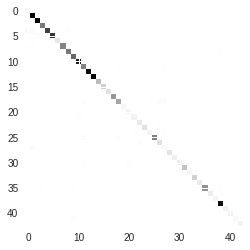

In [13]:
#look at confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
saver.restore(sess, tf.train.latest_checkpoint('.'))
total_predictions = None
num_examples = len(X_test)

for x in xrange(0, num_examples, BATCH_SIZE):
    batch_x, batch_y = X_test[x: x + BATCH_SIZE], y_test[x: x + BATCH_SIZE]
    predictions = sess.run(tf.argmax(model.logits, 1), feed_dict = {model.X: batch_x, model.Y: batch_y})

    if(total_predictions is None):
        total_predictions = predictions
    else:
        total_predictions = np.hstack([total_predictions, predictions])
            
mat = confusion_matrix(y_test, total_predictions)
plt.imshow(mat, interpolation = 'nearest')
report = classification_report(y_test, total_predictions)
print report

In [19]:
import pandas as pd
dataset = pd.read_csv('signnames.csv')
dataset

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


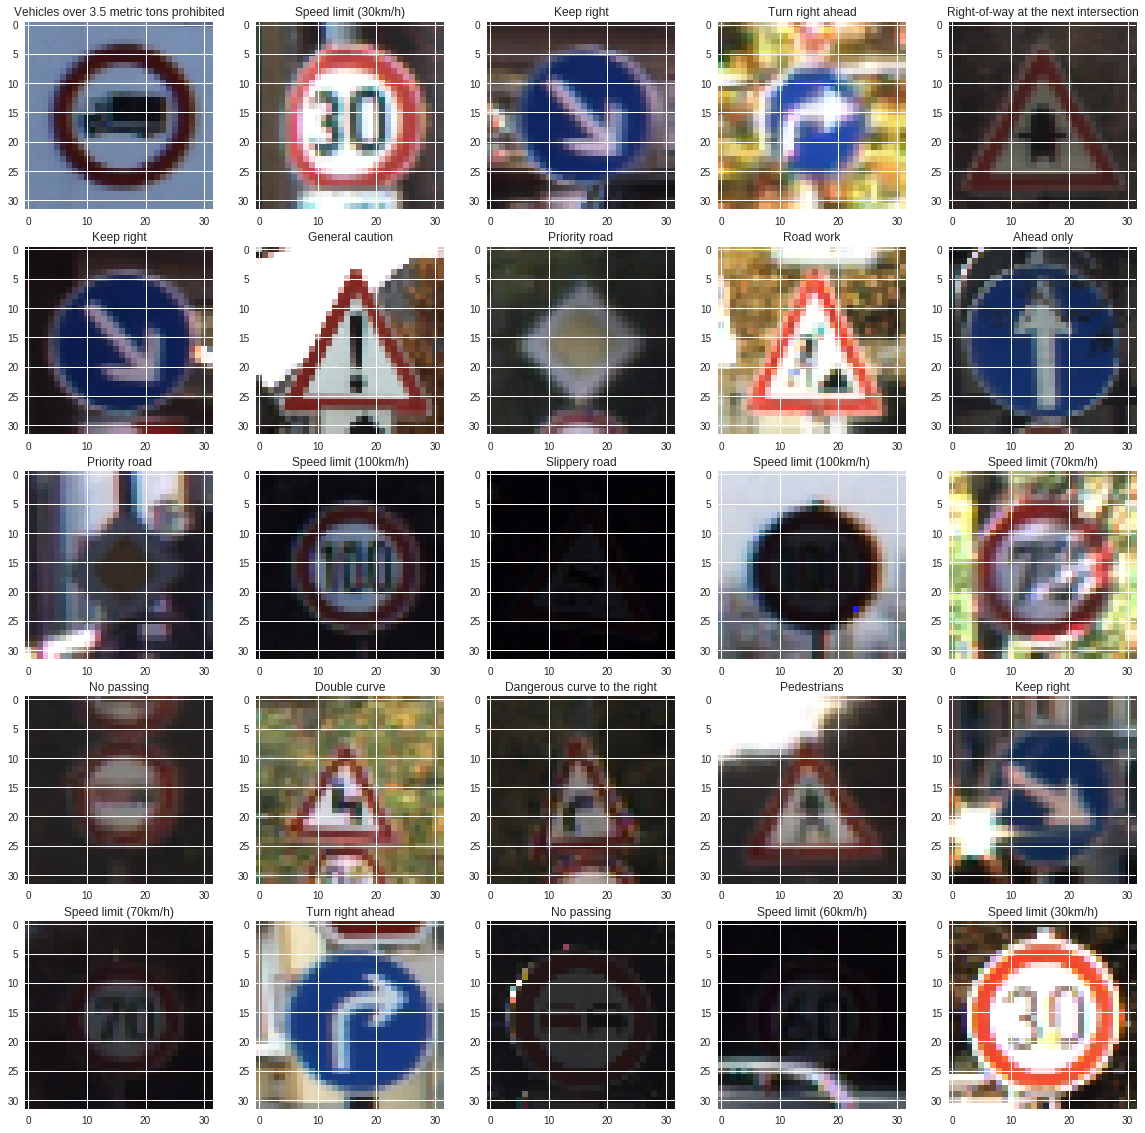

In [30]:
batch_x = X_test[0: 25]
logits = sess.run(model.logits, feed_dict = {model.X: batch_x})

plt.figure(figsize = (20, 20))

num_print = 5

for k in xrange(0, num_print * num_print):
    plt.subplot(num_print, num_print, k + 1)
    label = dataset.ix[np.argmax(logits[k]), 1]
    plt.imshow(X_test[k])
    plt.title(label)
    
plt.savefig('output.png')
plt.show()